# Imports

In [90]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

import warnings
warnings.simplefilter(action='ignore', category=Warning)

import matplotlib.pyplot as plt
from IPython.display       import Image
from IPython.core.display  import HTML

import seaborn as sns
import optuna

from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.metrics import silhouette_score

# Helper Functions

In [91]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Data Load

In [92]:
df = pd.read_csv('../../data/Clusterizacao/X_dataset.csv')

In [93]:
df.shape

(178, 13)

# Machine Learning Models

## KMEANS

In [94]:
k_values = np.arange(2,30,1)
sil_list_kmeans = []

for i in k_values:
    kmeans = KMeans(n_clusters=i, random_state=42)
    
    kmeans.fit(df)
    clusters = kmeans.predict(df)

    sil_list_kmeans.append(silhouette_score(df, clusters) )




In [95]:
kmeans_report = pd.DataFrame(columns=['n_clusters','silhouette_score'])

kmeans_report['n_clusters'] = k_values
kmeans_report['silhouette_score'] = sil_list_kmeans
kmeans_report.sort_values('silhouette_score', ascending=False).head()

,n_clusters,silhouette_score
1,3,0.232959
2,4,0.230306
4,6,0.223678
0,2,0.213219
5,7,0.192272


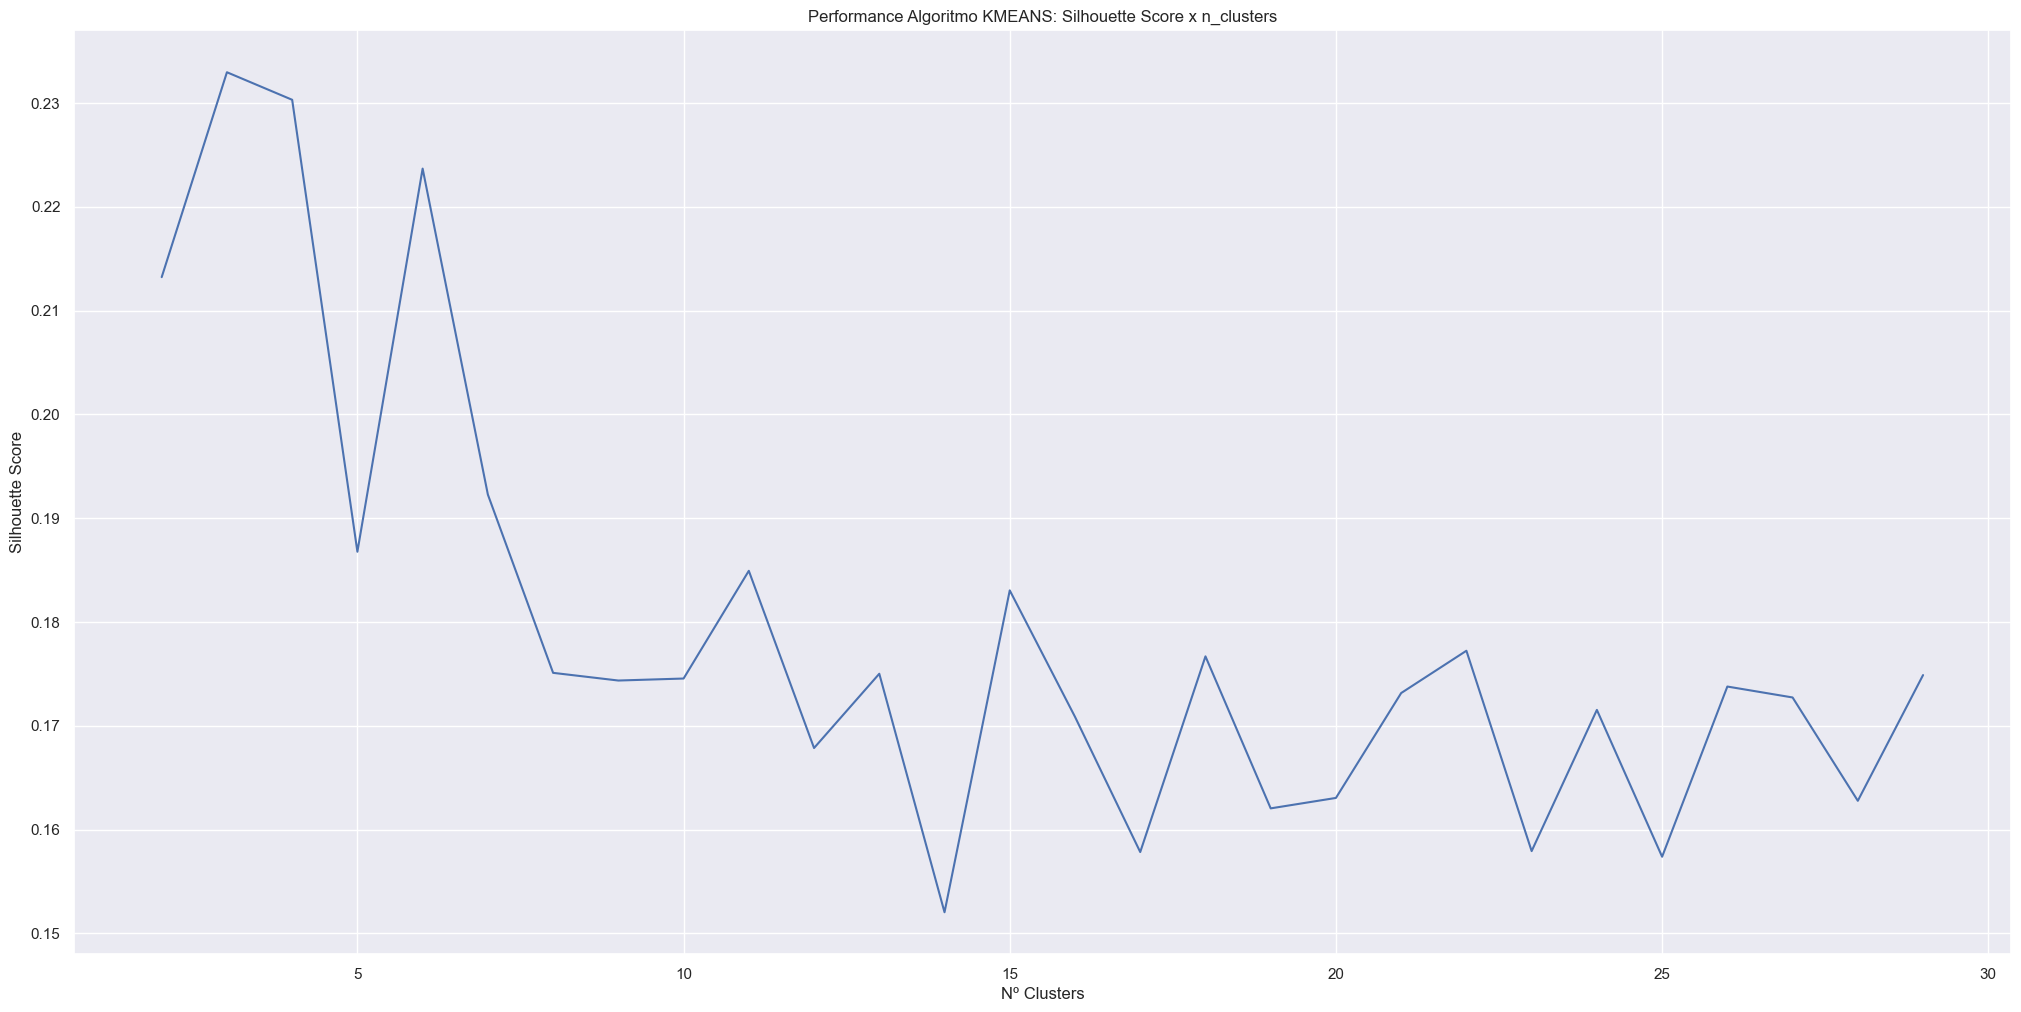

In [106]:
sns.lineplot(x=k_values, y=sil_list_kmeans)
plt.title("Performance Algoritmo KMEANS: Silhouette Score x n_clusters")
plt.ylabel("Silhouette Score")
plt.xlabel("Nº Clusters")
plt.savefig("kmeans.png")

<Figure size 2500x1200 with 0 Axes>

## Affinity Propagation

In [98]:
preferences_values = np.arange(-10,-80,-5)
sil_list_aff = []
qtd_clusters = []

for i in preferences_values:
    # model definition
    af_model = AffinityPropagation(preference=i)
    af_model.fit(df)

    clusters = af_model.predict(df)
    qtd_clusters.append(len(np.unique(clusters)))
    sil_list_aff.append(silhouette_score(df, clusters) )



In [99]:
affinity_report = pd.DataFrame(columns=['n_clusters','preference', 'silhouette_score'])

affinity_report['n_clusters'] = qtd_clusters
affinity_report['preference'] = preferences_values
affinity_report['silhouette_score'] = sil_list_aff
affinity_report.sort_values('silhouette_score', ascending=False).head()

,n_clusters,preference,silhouette_score
8,7,-50,0.202286
9,7,-55,0.201180
7,7,-45,0.189619
5,8,-35,0.185867
10,6,-60,0.183181


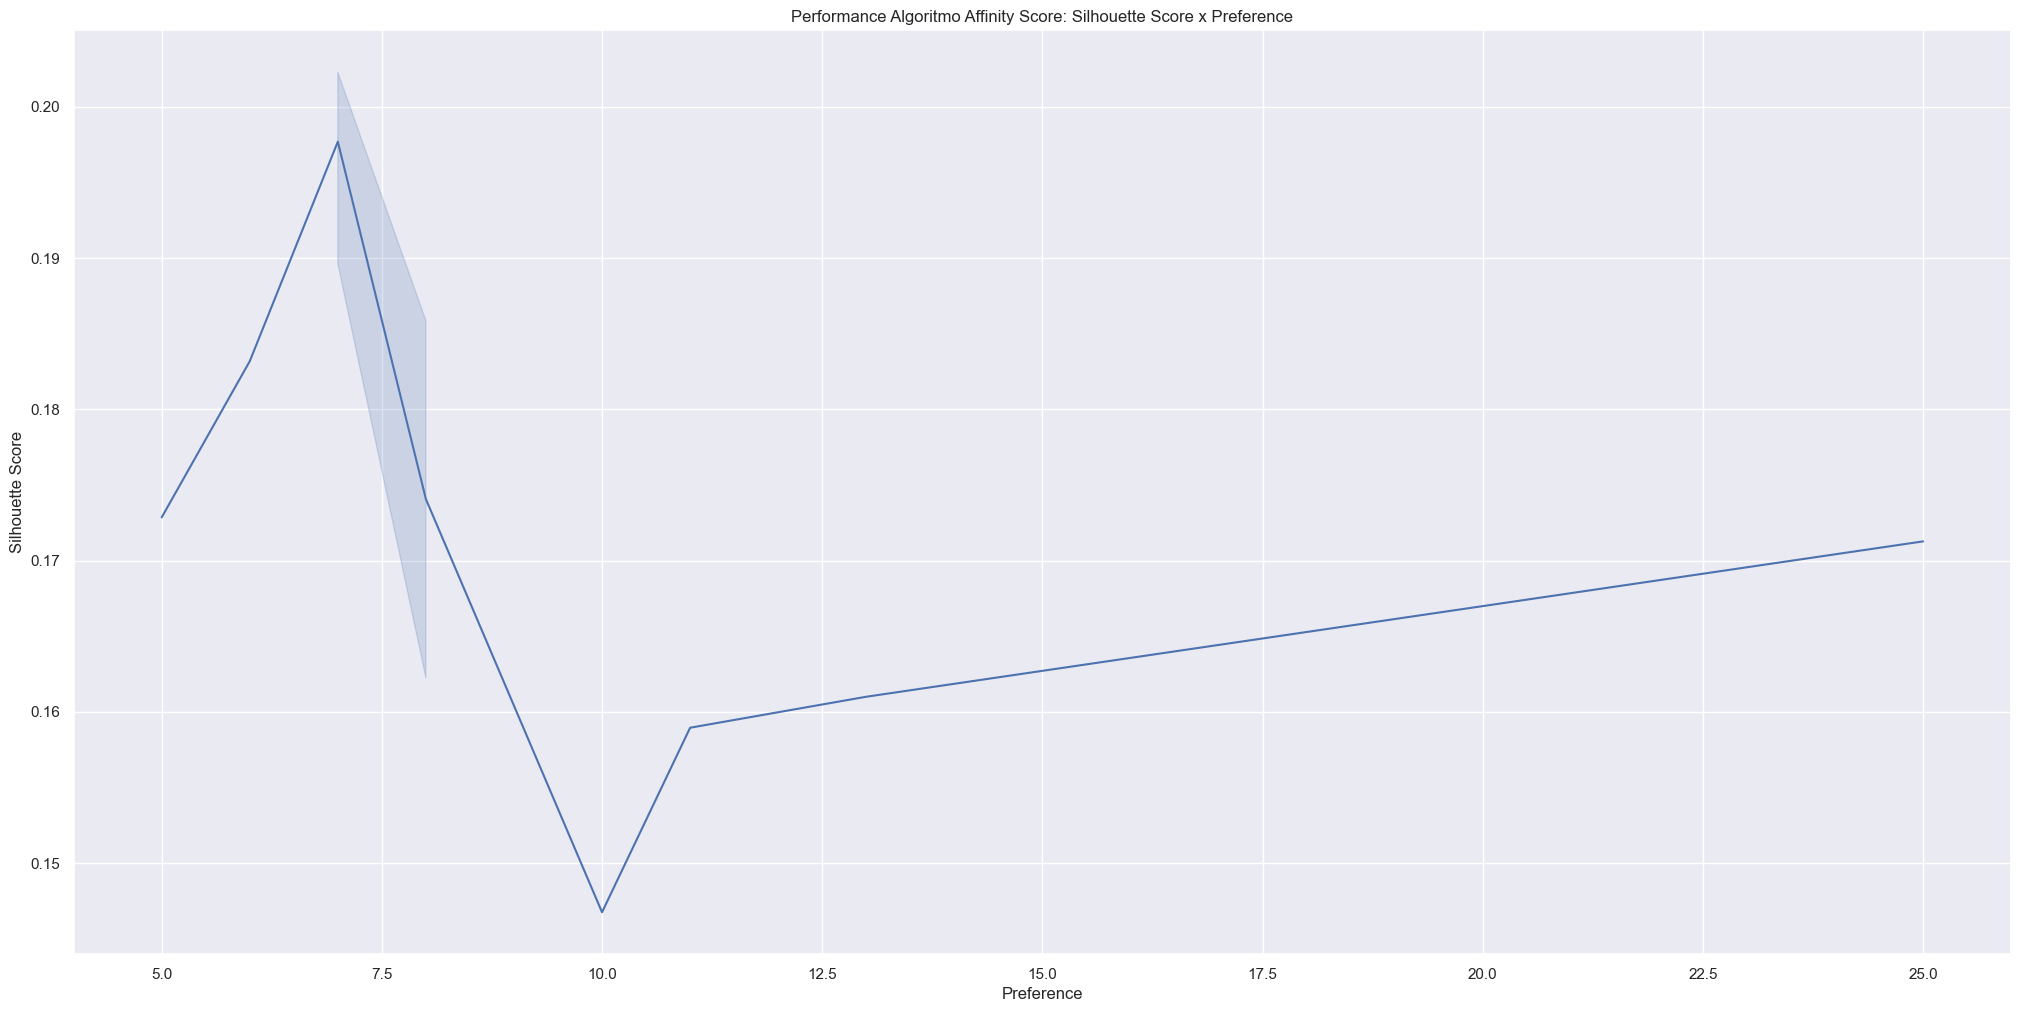

In [107]:
sns.lineplot(x=qtd_clusters, y=sil_list_aff)
plt.title("Performance Algoritmo Affinity Score: Silhouette Score x Preference")
plt.ylabel("Silhouette Score")
plt.xlabel("Preference")
plt.savefig("affinity.png")

<Figure size 2500x1200 with 0 Axes>